In [2]:
!pip install sklearn mediapipe 

  Using cached sklearn-0.0-py2.py3-none-any.whl


In [3]:
pip list

Package                      Version
---------------------------- ---------
absl-py                      1.0.0
asttokens                    2.0.5
astunparse                   1.6.3
attrs                        21.4.0
backcall                     0.2.0
black                        21.12b0
cachetools                   4.2.4
certifi                      2021.10.8
charset-normalizer           2.0.10
click                        8.0.3
colorama                     0.4.4
cycler                       0.11.0
debugpy                      1.5.1
decorator                    5.1.1
docutils                     0.18.1
entrypoints                  0.3
executing                    0.8.2
flatbuffers                  2.0
fonttools                    4.28.5
gast                         0.4.0
google-auth                  2.3.3
google-auth-oauthlib         0.4.6
google-pasta                 0.2.0
grpcio                       1.43.0
h5py                         3.6.0
idna                         3.3
importli

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [2]:
mp_holistic = mp.solutions.holistic 
mp_drawing = mp.solutions.drawing_utils

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [4]:
def draw_landmarks(image,results):
    mp_drawing.draw_landmarks(image,results.face_landmarks,mp_holistic.FACEMESH_TESSELATION)
    mp_drawing.draw_landmarks(image,results.pose_landmarks,mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image,results.left_hand_landmarks,mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image,results.right_hand_landmarks,mp_holistic.HAND_CONNECTIONS)
    
    

In [5]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [8]:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic :
    while cap.isOpened():
        ret, frame = cap.read()

        image, results = mediapipe_detection(frame,holistic)
#         print(results)
        
        draw_styled_landmarks(image,results)

        cv2.imshow('OpenCV Feed',image)
        if cv2.waitKey(10) & 0xFF ==ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [9]:
draw_landmarks(frame,results)

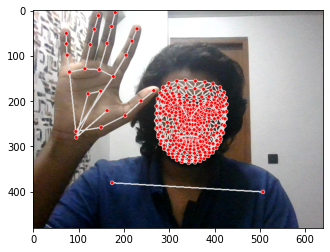

In [10]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [11]:
results.pose_landmarks

landmark {
  x: 0.5374283194541931
  y: 0.5055755376815796
  z: -1.080121636390686
  visibility: 0.999740719795227
}
landmark {
  x: 0.5796343088150024
  y: 0.432701051235199
  z: -1.0191693305969238
  visibility: 0.9994935989379883
}
landmark {
  x: 0.5991247892379761
  y: 0.43469861149787903
  z: -1.0189120769500732
  visibility: 0.9993395805358887
}
landmark {
  x: 0.614354133605957
  y: 0.43784916400909424
  z: -1.0192475318908691
  visibility: 0.9993739128112793
}
landmark {
  x: 0.5079033374786377
  y: 0.4279716908931732
  z: -1.0065412521362305
  visibility: 0.9995469450950623
}
landmark {
  x: 0.4850110411643982
  y: 0.4261524975299835
  z: -1.0055915117263794
  visibility: 0.9994917511940002
}
landmark {
  x: 0.4628449082374573
  y: 0.4254598915576935
  z: -1.0058261156082153
  visibility: 0.9996209144592285
}
landmark {
  x: 0.6437323093414307
  y: 0.4703979194164276
  z: -0.5640994906425476
  visibility: 0.9993100762367249
}
landmark {
  x: 0.4400286078453064
  y: 0.45069590

In [6]:
def extract_keypoints(results):
    face = np.array([[res.x,res.y,res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
    pose = np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
    lh = np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(63)
    rh = np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(63)
    return np.concatenate([pose, face, lh, rh])

In [8]:
result_test = extract_keypoints(results)

NameError: name 'results' is not defined

In [28]:
result_test.shape

(1662,)

In [29]:
np.save('0',result_test)

In [9]:
DATA_PATH = os.path.join('MP_Data')
actions = np.array(['hello','thanks','iloveyou'])
no_sequences = 30
sequence_length = 30 

In [9]:
for action in actions :
    for sequence in range(no_sequences):
        try :
            os.makedirs(os.path.join(DATA_PATH,action, str(sequence)))
        except :
            pass

In [10]:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic :
    for action in actions :
        for sequence in range(no_sequences):
            for frame_num in range(sequence_length):

                ret, frame = cap.read()

                image, results = mediapipe_detection(frame,holistic)
        #         print(results)

                draw_styled_landmarks(image,results)
            
                if frame_num == 0: 
                    cv2.putText(image,'STARTING_COLLECTION',(120,200),
                               cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),4,cv2.LINE_AA)
                    cv2.putText(image,'Collecting frames for {} Video Number {}'.format(action,sequence),(15,12),
                               cv2.FONT_HERSHEY_SIMPLEX,0.5, (0,0,255),1,cv2.LINE_AA)
                    cv2.waitKey(2000)
                else:
                    cv2.putText(image,'Collecting frames for {} Video Number {}'.format(action,sequence),(15,12),
                               cv2.FONT_HERSHEY_SIMPLEX,0.5, (0,0,255),1,cv2.LINE_AA)
                
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH,action,str(sequence),str(frame_num))
                np.save(npy_path,keypoints)
                
                cv2.imshow('OpenCV Feed',image)
                
                if cv2.waitKey(10) & 0xFF ==ord('q'):
                    break
    cap.release()
    cv2.destroyAllWindows()

In [7]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [11]:
label_map = {label:num for num, label in enumerate(actions)}
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [12]:
sequences, labels = [] , []
for action in actions :
    for sequence in range(no_sequences) :
        window=[]
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH,action,str(sequence),"{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [15]:
np.array(sequences).shape

(90, 30, 1662)

In [17]:
np.array(labels).shape

(90,)

In [18]:
X = np.array(sequences)

In [19]:
X.shape

(90, 30, 1662)

In [20]:
y = to_categorical(labels).astype(int)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.05)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [24]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [27]:
model = Sequential()
model.add(LSTM(64,return_sequences=True,activation='relu',input_shape=(30,1662)))
model.add(LSTM(128,return_sequences=True,activation='relu'))
model.add(LSTM(64, return_sequences=False,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(actions.shape[0],activation='softmax'))

In [29]:
model.compile(optimizer='Adam', loss='categorical_crossentropy',metrics=['categorical_accuracy'])

In [30]:
model.fit(X_train,y_train,epochs=2000,callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 6s 151ms/step - loss: 8.1233 - categorical_accuracy: 0.3059
Epoch 2/2000
3/3 [==============================] - 1s 267ms/step - loss: 18.3310 - categorical_accuracy: 0.3882
Epoch 3/2000
3/3 [==============================] - 1s 164ms/step - loss: 49.0277 - categorical_accuracy: 0.3529
Epoch 4/2000
3/3 [==============================] - 1s 179ms/step - loss: 35.7988 - categorical_accuracy: 0.3529
Epoch 5/2000
3/3 [==============================] - 0s 169ms/step - loss: 35.8765 - categorical_accuracy: 0.3765
Epoch 6/2000
3/3 [==============================] - 1s 198ms/step - loss: 53.0825 - categorical_accuracy: 0.2824
Epoch 7/2000
3/3 [==============================] - 1s 202ms/step - loss: 72.8480 - categorical_accuracy: 0.4000
Epoch 8/2000
3/3 [==============================] - 1s 179ms/step - loss: 41.0991 - categorical_accuracy: 0.3412
Epoch 9/2000
3/3 [==============================] - 1s 162ms/step - loss: 53.6093 - categorical_a

3/3 [==============================] - 1s 213ms/step - loss: 1.9012 - categorical_accuracy: 0.6118
Epoch 74/2000
3/3 [==============================] - 1s 299ms/step - loss: 3.5995 - categorical_accuracy: 0.2824
Epoch 75/2000
3/3 [==============================] - 1s 275ms/step - loss: 4.6030 - categorical_accuracy: 0.4118
Epoch 76/2000
3/3 [==============================] - 1s 201ms/step - loss: 4.2120 - categorical_accuracy: 0.3882
Epoch 77/2000
3/3 [==============================] - 1s 279ms/step - loss: 3.8218 - categorical_accuracy: 0.4588
Epoch 78/2000
3/3 [==============================] - 1s 229ms/step - loss: 2.5308 - categorical_accuracy: 0.3647
Epoch 79/2000
3/3 [==============================] - 1s 280ms/step - loss: 2.0324 - categorical_accuracy: 0.3412
Epoch 80/2000
3/3 [==============================] - 1s 191ms/step - loss: 1.2147 - categorical_accuracy: 0.6471
Epoch 81/2000
3/3 [==============================] - 1s 193ms/step - loss: 1.3423 - categorical_accuracy: 0.58

3/3 [==============================] - 1s 186ms/step - loss: 6.5265 - categorical_accuracy: 0.5059
Epoch 146/2000
3/3 [==============================] - 1s 180ms/step - loss: 4.8115 - categorical_accuracy: 0.4118
Epoch 147/2000
3/3 [==============================] - 1s 229ms/step - loss: 2.8416 - categorical_accuracy: 0.4353
Epoch 148/2000
3/3 [==============================] - 1s 164ms/step - loss: 2.8534 - categorical_accuracy: 0.3882
Epoch 149/2000
3/3 [==============================] - 1s 158ms/step - loss: 5.2103 - categorical_accuracy: 0.2941
Epoch 150/2000
3/3 [==============================] - 1s 188ms/step - loss: 6.3280 - categorical_accuracy: 0.4118
Epoch 151/2000
3/3 [==============================] - 1s 193ms/step - loss: 12.1661 - categorical_accuracy: 0.3529
Epoch 152/2000
3/3 [==============================] - 1s 237ms/step - loss: 4.9185 - categorical_accuracy: 0.6235
Epoch 153/2000
3/3 [==============================] - 1s 209ms/step - loss: 9.7161 - categorical_accur

Epoch 217/2000
3/3 [==============================] - 1s 202ms/step - loss: 1.2654 - categorical_accuracy: 0.6824
Epoch 218/2000
3/3 [==============================] - 1s 193ms/step - loss: 0.9363 - categorical_accuracy: 0.6235
Epoch 219/2000
3/3 [==============================] - 1s 183ms/step - loss: 1.1079 - categorical_accuracy: 0.6235
Epoch 220/2000
3/3 [==============================] - 1s 191ms/step - loss: 1.8788 - categorical_accuracy: 0.7294
Epoch 221/2000
3/3 [==============================] - 1s 186ms/step - loss: 2.3428 - categorical_accuracy: 0.6000
Epoch 222/2000
3/3 [==============================] - 1s 175ms/step - loss: 1.7143 - categorical_accuracy: 0.6588
Epoch 223/2000
3/3 [==============================] - 1s 196ms/step - loss: 2.3339 - categorical_accuracy: 0.6235
Epoch 224/2000
3/3 [==============================] - 1s 336ms/step - loss: 1.4096 - categorical_accuracy: 0.6824
Epoch 225/2000
3/3 [==============================] - 1s 214ms/step - loss: 1.6678 - cat

3/3 [==============================] - 1s 206ms/step - loss: 3.6493 - categorical_accuracy: 0.5647
Epoch 289/2000
3/3 [==============================] - 1s 257ms/step - loss: 5.5132 - categorical_accuracy: 0.5294
Epoch 290/2000
3/3 [==============================] - 1s 259ms/step - loss: 5.7290 - categorical_accuracy: 0.6000
Epoch 291/2000
3/3 [==============================] - 1s 216ms/step - loss: 2.7383 - categorical_accuracy: 0.6118
Epoch 292/2000
3/3 [==============================] - 1s 204ms/step - loss: 2.3810 - categorical_accuracy: 0.6824
Epoch 293/2000
3/3 [==============================] - 1s 195ms/step - loss: 2.2407 - categorical_accuracy: 0.5882
Epoch 294/2000
3/3 [==============================] - 1s 202ms/step - loss: 2.5932 - categorical_accuracy: 0.5647
Epoch 295/2000
3/3 [==============================] - 1s 214ms/step - loss: 2.7751 - categorical_accuracy: 0.6235
Epoch 296/2000
3/3 [==============================] - 1s 185ms/step - loss: 3.4378 - categorical_accura

3/3 [==============================] - 1s 218ms/step - loss: 1.4009 - categorical_accuracy: 0.5412
Epoch 360/2000
3/3 [==============================] - 1s 219ms/step - loss: 0.7960 - categorical_accuracy: 0.6588
Epoch 361/2000
3/3 [==============================] - 1s 197ms/step - loss: 1.2295 - categorical_accuracy: 0.6588
Epoch 362/2000
3/3 [==============================] - 1s 173ms/step - loss: 2.1161 - categorical_accuracy: 0.6118
Epoch 363/2000
3/3 [==============================] - 1s 185ms/step - loss: 2.1377 - categorical_accuracy: 0.6118
Epoch 364/2000
3/3 [==============================] - 1s 189ms/step - loss: 2.0323 - categorical_accuracy: 0.6118
Epoch 365/2000
3/3 [==============================] - 1s 209ms/step - loss: 2.3444 - categorical_accuracy: 0.5294
Epoch 366/2000
3/3 [==============================] - 1s 196ms/step - loss: 1.4375 - categorical_accuracy: 0.6000
Epoch 367/2000
3/3 [==============================] - 1s 237ms/step - loss: 1.5259 - categorical_accura

Epoch 431/2000
3/3 [==============================] - 1s 239ms/step - loss: 1.5883 - categorical_accuracy: 0.6353
Epoch 432/2000
3/3 [==============================] - 1s 221ms/step - loss: 2.1625 - categorical_accuracy: 0.6000
Epoch 433/2000
3/3 [==============================] - 1s 208ms/step - loss: 1.8787 - categorical_accuracy: 0.6941
Epoch 434/2000
3/3 [==============================] - 1s 199ms/step - loss: 2.4268 - categorical_accuracy: 0.6706
Epoch 435/2000
3/3 [==============================] - 1s 225ms/step - loss: 2.4278 - categorical_accuracy: 0.5412
Epoch 436/2000
3/3 [==============================] - 1s 207ms/step - loss: 2.4970 - categorical_accuracy: 0.5882
Epoch 437/2000
3/3 [==============================] - 1s 191ms/step - loss: 3.1712 - categorical_accuracy: 0.5176
Epoch 438/2000
3/3 [==============================] - 1s 224ms/step - loss: 1.6910 - categorical_accuracy: 0.5059
Epoch 439/2000
3/3 [==============================] - 1s 172ms/step - loss: 2.0999 - cat

3/3 [==============================] - 1s 221ms/step - loss: 1.6467 - categorical_accuracy: 0.5529
Epoch 503/2000
3/3 [==============================] - 1s 238ms/step - loss: 1.6505 - categorical_accuracy: 0.6353
Epoch 504/2000
3/3 [==============================] - 1s 199ms/step - loss: 1.2631 - categorical_accuracy: 0.6588
Epoch 505/2000
3/3 [==============================] - 1s 209ms/step - loss: 0.9528 - categorical_accuracy: 0.6471
Epoch 506/2000
3/3 [==============================] - 1s 198ms/step - loss: 0.9795 - categorical_accuracy: 0.6471
Epoch 507/2000
3/3 [==============================] - 1s 279ms/step - loss: 0.5262 - categorical_accuracy: 0.7412
Epoch 508/2000
3/3 [==============================] - 1s 239ms/step - loss: 0.9380 - categorical_accuracy: 0.6118
Epoch 509/2000
3/3 [==============================] - 1s 197ms/step - loss: 0.5896 - categorical_accuracy: 0.6353
Epoch 510/2000
3/3 [==============================] - 1s 244ms/step - loss: 0.6097 - categorical_accura

Epoch 574/2000
3/3 [==============================] - 1s 227ms/step - loss: 0.8723 - categorical_accuracy: 0.6000
Epoch 575/2000
3/3 [==============================] - 1s 261ms/step - loss: 0.5665 - categorical_accuracy: 0.7059
Epoch 576/2000
3/3 [==============================] - 1s 288ms/step - loss: 0.7374 - categorical_accuracy: 0.6941
Epoch 577/2000
3/3 [==============================] - 1s 382ms/step - loss: 1.1716 - categorical_accuracy: 0.6588
Epoch 578/2000
3/3 [==============================] - 1s 373ms/step - loss: 0.9931 - categorical_accuracy: 0.6706
Epoch 579/2000
3/3 [==============================] - 1s 367ms/step - loss: 1.4628 - categorical_accuracy: 0.6000
Epoch 580/2000
3/3 [==============================] - 1s 329ms/step - loss: 1.7891 - categorical_accuracy: 0.6353
Epoch 581/2000
3/3 [==============================] - 1s 309ms/step - loss: 1.2545 - categorical_accuracy: 0.6118
Epoch 582/2000
3/3 [==============================] - 1s 320ms/step - loss: 1.1244 - cat

3/3 [==============================] - 1s 220ms/step - loss: 0.9503 - categorical_accuracy: 0.6824
Epoch 646/2000
3/3 [==============================] - 1s 270ms/step - loss: 0.9697 - categorical_accuracy: 0.6235
Epoch 647/2000
3/3 [==============================] - 1s 218ms/step - loss: 0.9486 - categorical_accuracy: 0.6000
Epoch 648/2000
3/3 [==============================] - 1s 202ms/step - loss: 1.1251 - categorical_accuracy: 0.6588
Epoch 649/2000
3/3 [==============================] - 1s 222ms/step - loss: 1.1767 - categorical_accuracy: 0.7059
Epoch 650/2000
3/3 [==============================] - 1s 198ms/step - loss: 0.9483 - categorical_accuracy: 0.6824
Epoch 651/2000
3/3 [==============================] - 1s 195ms/step - loss: 0.5930 - categorical_accuracy: 0.7294
Epoch 652/2000
3/3 [==============================] - 1s 203ms/step - loss: 0.5607 - categorical_accuracy: 0.7765
Epoch 653/2000
3/3 [==============================] - 1s 221ms/step - loss: 0.5101 - categorical_accura

Epoch 717/2000
3/3 [==============================] - 1s 180ms/step - loss: 0.5351 - categorical_accuracy: 0.7529
Epoch 718/2000
3/3 [==============================] - 0s 161ms/step - loss: 0.4504 - categorical_accuracy: 0.8000
Epoch 719/2000
3/3 [==============================] - 1s 170ms/step - loss: 0.3941 - categorical_accuracy: 0.7765
Epoch 720/2000
3/3 [==============================] - 1s 171ms/step - loss: 0.6433 - categorical_accuracy: 0.7294
Epoch 721/2000
3/3 [==============================] - 1s 176ms/step - loss: 0.8497 - categorical_accuracy: 0.6471
Epoch 722/2000
3/3 [==============================] - 1s 178ms/step - loss: 0.6116 - categorical_accuracy: 0.7647
Epoch 723/2000
3/3 [==============================] - 1s 179ms/step - loss: 0.5916 - categorical_accuracy: 0.7294
Epoch 724/2000
3/3 [==============================] - 1s 186ms/step - loss: 0.8206 - categorical_accuracy: 0.6941
Epoch 725/2000
3/3 [==============================] - 1s 232ms/step - loss: 0.8652 - cat

3/3 [==============================] - 1s 199ms/step - loss: 1.4653 - categorical_accuracy: 0.4706
Epoch 789/2000
3/3 [==============================] - 1s 192ms/step - loss: 0.9395 - categorical_accuracy: 0.6235
Epoch 790/2000
3/3 [==============================] - 1s 173ms/step - loss: 0.7168 - categorical_accuracy: 0.6941
Epoch 791/2000
3/3 [==============================] - 1s 207ms/step - loss: 0.7858 - categorical_accuracy: 0.7294
Epoch 792/2000
3/3 [==============================] - 1s 238ms/step - loss: 0.8098 - categorical_accuracy: 0.6118
Epoch 793/2000
3/3 [==============================] - 1s 166ms/step - loss: 0.9667 - categorical_accuracy: 0.5294
Epoch 794/2000
3/3 [==============================] - 1s 175ms/step - loss: 1.0170 - categorical_accuracy: 0.5765
Epoch 795/2000
3/3 [==============================] - 1s 194ms/step - loss: 1.1004 - categorical_accuracy: 0.4941
Epoch 796/2000
3/3 [==============================] - 1s 178ms/step - loss: 0.8642 - categorical_accura

Epoch 860/2000
3/3 [==============================] - 1s 249ms/step - loss: 0.5369 - categorical_accuracy: 0.7059
Epoch 861/2000
3/3 [==============================] - 1s 185ms/step - loss: 0.6000 - categorical_accuracy: 0.7176
Epoch 862/2000
3/3 [==============================] - 1s 209ms/step - loss: 0.7599 - categorical_accuracy: 0.6471
Epoch 863/2000
3/3 [==============================] - 1s 181ms/step - loss: 0.9113 - categorical_accuracy: 0.6588
Epoch 864/2000
3/3 [==============================] - 1s 271ms/step - loss: 1.0047 - categorical_accuracy: 0.6588
Epoch 865/2000
3/3 [==============================] - 1s 198ms/step - loss: 0.9020 - categorical_accuracy: 0.6118
Epoch 866/2000
3/3 [==============================] - 1s 191ms/step - loss: 0.7213 - categorical_accuracy: 0.6824
Epoch 867/2000
3/3 [==============================] - 1s 208ms/step - loss: 0.6096 - categorical_accuracy: 0.6941
Epoch 868/2000
3/3 [==============================] - 1s 179ms/step - loss: 0.6955 - cat

3/3 [==============================] - 1s 204ms/step - loss: 0.8868 - categorical_accuracy: 0.6118
Epoch 932/2000
3/3 [==============================] - 1s 205ms/step - loss: 0.8365 - categorical_accuracy: 0.6118
Epoch 933/2000
3/3 [==============================] - 1s 195ms/step - loss: 1.4413 - categorical_accuracy: 0.5765
Epoch 934/2000
3/3 [==============================] - 1s 183ms/step - loss: 1.8286 - categorical_accuracy: 0.5176
Epoch 935/2000
3/3 [==============================] - 1s 194ms/step - loss: 1.6111 - categorical_accuracy: 0.6353
Epoch 936/2000
3/3 [==============================] - 1s 177ms/step - loss: 1.3348 - categorical_accuracy: 0.6353
Epoch 937/2000
3/3 [==============================] - 1s 189ms/step - loss: 1.3007 - categorical_accuracy: 0.6353
Epoch 938/2000
3/3 [==============================] - 1s 203ms/step - loss: 1.3766 - categorical_accuracy: 0.5647
Epoch 939/2000
3/3 [==============================] - 1s 183ms/step - loss: 0.9749 - categorical_accura

Epoch 1003/2000
3/3 [==============================] - 1s 316ms/step - loss: 0.9457 - categorical_accuracy: 0.7059
Epoch 1004/2000
3/3 [==============================] - 1s 273ms/step - loss: 0.9408 - categorical_accuracy: 0.7059
Epoch 1005/2000
3/3 [==============================] - 1s 256ms/step - loss: 0.9289 - categorical_accuracy: 0.7059
Epoch 1006/2000
3/3 [==============================] - 1s 234ms/step - loss: 0.6183 - categorical_accuracy: 0.7412
Epoch 1007/2000
3/3 [==============================] - 1s 210ms/step - loss: 0.4566 - categorical_accuracy: 0.8118
Epoch 1008/2000
3/3 [==============================] - 1s 183ms/step - loss: 0.3716 - categorical_accuracy: 0.8353
Epoch 1009/2000
3/3 [==============================] - 1s 210ms/step - loss: 0.4902 - categorical_accuracy: 0.8118
Epoch 1010/2000
3/3 [==============================] - 1s 198ms/step - loss: 0.4502 - categorical_accuracy: 0.8000
Epoch 1011/2000
3/3 [==============================] - 1s 202ms/step - loss: 0.4

3/3 [==============================] - 1s 336ms/step - loss: 0.5713 - categorical_accuracy: 0.7176
Epoch 1075/2000
3/3 [==============================] - 1s 417ms/step - loss: 0.7408 - categorical_accuracy: 0.7412
Epoch 1076/2000
3/3 [==============================] - 1s 199ms/step - loss: 0.7515 - categorical_accuracy: 0.7412
Epoch 1077/2000
3/3 [==============================] - 1s 233ms/step - loss: 0.5020 - categorical_accuracy: 0.7529
Epoch 1078/2000
3/3 [==============================] - 1s 168ms/step - loss: 0.6508 - categorical_accuracy: 0.7647
Epoch 1079/2000
3/3 [==============================] - 1s 238ms/step - loss: 1.2616 - categorical_accuracy: 0.6824
Epoch 1080/2000
3/3 [==============================] - 1s 217ms/step - loss: 1.2947 - categorical_accuracy: 0.6471
Epoch 1081/2000
3/3 [==============================] - 1s 170ms/step - loss: 0.7977 - categorical_accuracy: 0.7059
Epoch 1082/2000
3/3 [==============================] - 1s 188ms/step - loss: 0.7720 - categorica

3/3 [==============================] - 1s 251ms/step - loss: 0.3810 - categorical_accuracy: 0.8000
Epoch 1146/2000
3/3 [==============================] - 1s 210ms/step - loss: 0.3791 - categorical_accuracy: 0.7294
Epoch 1147/2000
3/3 [==============================] - 1s 204ms/step - loss: 0.3346 - categorical_accuracy: 0.8353
Epoch 1148/2000
3/3 [==============================] - 1s 198ms/step - loss: 0.4921 - categorical_accuracy: 0.7529
Epoch 1149/2000
3/3 [==============================] - 1s 181ms/step - loss: 0.5159 - categorical_accuracy: 0.8118
Epoch 1150/2000
3/3 [==============================] - 1s 180ms/step - loss: 0.8482 - categorical_accuracy: 0.6941
Epoch 1151/2000
3/3 [==============================] - 1s 202ms/step - loss: 1.0189 - categorical_accuracy: 0.5882
Epoch 1152/2000
3/3 [==============================] - 1s 336ms/step - loss: 0.8155 - categorical_accuracy: 0.6706
Epoch 1153/2000
3/3 [==============================] - 1s 219ms/step - loss: 0.5847 - categorica

Epoch 1216/2000
3/3 [==============================] - 1s 150ms/step - loss: 0.5706 - categorical_accuracy: 0.7059
Epoch 1217/2000
3/3 [==============================] - 1s 174ms/step - loss: 0.3870 - categorical_accuracy: 0.8941
Epoch 1218/2000
3/3 [==============================] - 0s 164ms/step - loss: 0.4432 - categorical_accuracy: 0.8000
Epoch 1219/2000
3/3 [==============================] - 1s 185ms/step - loss: 0.4309 - categorical_accuracy: 0.7765
Epoch 1220/2000
3/3 [==============================] - 1s 200ms/step - loss: 0.6869 - categorical_accuracy: 0.7176
Epoch 1221/2000
3/3 [==============================] - 1s 187ms/step - loss: 0.7119 - categorical_accuracy: 0.6353
Epoch 1222/2000
3/3 [==============================] - 1s 166ms/step - loss: 0.4826 - categorical_accuracy: 0.7882
Epoch 1223/2000
3/3 [==============================] - 1s 176ms/step - loss: 0.4841 - categorical_accuracy: 0.7647
Epoch 1224/2000
3/3 [==============================] - 1s 175ms/step - loss: 0.7

3/3 [==============================] - 1s 192ms/step - loss: 0.5798 - categorical_accuracy: 0.7176
Epoch 1287/2000
3/3 [==============================] - 1s 163ms/step - loss: 0.7530 - categorical_accuracy: 0.6235
Epoch 1288/2000
3/3 [==============================] - 1s 164ms/step - loss: 0.8701 - categorical_accuracy: 0.6353
Epoch 1289/2000
3/3 [==============================] - 1s 167ms/step - loss: 0.6979 - categorical_accuracy: 0.6824
Epoch 1290/2000
3/3 [==============================] - 1s 189ms/step - loss: 0.6371 - categorical_accuracy: 0.7176
Epoch 1291/2000
3/3 [==============================] - 1s 170ms/step - loss: 0.6626 - categorical_accuracy: 0.7529
Epoch 1292/2000
3/3 [==============================] - 1s 229ms/step - loss: 0.9409 - categorical_accuracy: 0.6706
Epoch 1293/2000
3/3 [==============================] - 1s 164ms/step - loss: 1.4054 - categorical_accuracy: 0.6706
Epoch 1294/2000
3/3 [==============================] - 1s 192ms/step - loss: 1.2299 - categorica

3/3 [==============================] - 1s 190ms/step - loss: 3.9869 - categorical_accuracy: 0.2471
Epoch 1357/2000
3/3 [==============================] - 1s 198ms/step - loss: 2.2930 - categorical_accuracy: 0.5647
Epoch 1358/2000
3/3 [==============================] - 1s 187ms/step - loss: 9.0868 - categorical_accuracy: 0.4000
Epoch 1359/2000
3/3 [==============================] - 1s 192ms/step - loss: 3.3912 - categorical_accuracy: 0.3059
Epoch 1360/2000
3/3 [==============================] - 0s 170ms/step - loss: 3.0553 - categorical_accuracy: 0.4471
Epoch 1361/2000
3/3 [==============================] - 1s 171ms/step - loss: 5.4579 - categorical_accuracy: 0.3647
Epoch 1362/2000
3/3 [==============================] - 1s 177ms/step - loss: 7.9160 - categorical_accuracy: 0.3412
Epoch 1363/2000
3/3 [==============================] - 0s 162ms/step - loss: 8.3718 - categorical_accuracy: 0.3529
Epoch 1364/2000
3/3 [==============================] - 1s 193ms/step - loss: 6.7199 - categorica

3/3 [==============================] - 1s 162ms/step - loss: 0.9344 - categorical_accuracy: 0.5882
Epoch 1428/2000
3/3 [==============================] - 1s 170ms/step - loss: 0.9682 - categorical_accuracy: 0.4941
Epoch 1429/2000
3/3 [==============================] - 0s 165ms/step - loss: 1.0615 - categorical_accuracy: 0.5412
Epoch 1430/2000
3/3 [==============================] - 1s 235ms/step - loss: 1.0231 - categorical_accuracy: 0.5647
Epoch 1431/2000
3/3 [==============================] - 1s 203ms/step - loss: 1.0036 - categorical_accuracy: 0.4941
Epoch 1432/2000
3/3 [==============================] - 1s 195ms/step - loss: 0.9420 - categorical_accuracy: 0.5647
Epoch 1433/2000
3/3 [==============================] - 1s 191ms/step - loss: 0.9823 - categorical_accuracy: 0.5176
Epoch 1434/2000
3/3 [==============================] - 1s 194ms/step - loss: 0.9766 - categorical_accuracy: 0.6588
Epoch 1435/2000
3/3 [==============================] - 1s 194ms/step - loss: 0.9698 - categorica

Epoch 1498/2000
3/3 [==============================] - 0s 156ms/step - loss: 1.1647 - categorical_accuracy: 0.5882
Epoch 1499/2000
3/3 [==============================] - 1s 182ms/step - loss: 1.1807 - categorical_accuracy: 0.6471
Epoch 1500/2000
3/3 [==============================] - 1s 181ms/step - loss: 0.9454 - categorical_accuracy: 0.6471
Epoch 1501/2000
3/3 [==============================] - 1s 189ms/step - loss: 1.1701 - categorical_accuracy: 0.6000
Epoch 1502/2000
3/3 [==============================] - 1s 181ms/step - loss: 0.9782 - categorical_accuracy: 0.5412
Epoch 1503/2000
3/3 [==============================] - 0s 154ms/step - loss: 0.7876 - categorical_accuracy: 0.5529
Epoch 1504/2000
3/3 [==============================] - 1s 172ms/step - loss: 0.7826 - categorical_accuracy: 0.6706
Epoch 1505/2000
3/3 [==============================] - 1s 166ms/step - loss: 0.7710 - categorical_accuracy: 0.5882
Epoch 1506/2000
3/3 [==============================] - 1s 189ms/step - loss: 0.8

3/3 [==============================] - 1s 175ms/step - loss: 1.1422 - categorical_accuracy: 0.6235
Epoch 1570/2000
3/3 [==============================] - 1s 209ms/step - loss: 1.1281 - categorical_accuracy: 0.6353
Epoch 1571/2000
3/3 [==============================] - 1s 185ms/step - loss: 1.2192 - categorical_accuracy: 0.6000
Epoch 1572/2000
3/3 [==============================] - 0s 164ms/step - loss: 0.9494 - categorical_accuracy: 0.6235
Epoch 1573/2000
3/3 [==============================] - 1s 180ms/step - loss: 0.8822 - categorical_accuracy: 0.6118
Epoch 1574/2000
3/3 [==============================] - 1s 174ms/step - loss: 0.8904 - categorical_accuracy: 0.6000
Epoch 1575/2000
3/3 [==============================] - 1s 179ms/step - loss: 0.8484 - categorical_accuracy: 0.6353
Epoch 1576/2000
3/3 [==============================] - 1s 173ms/step - loss: 0.8193 - categorical_accuracy: 0.6824
Epoch 1577/2000
3/3 [==============================] - 1s 188ms/step - loss: 0.7347 - categorica

Epoch 1640/2000
3/3 [==============================] - 1s 184ms/step - loss: 0.6633 - categorical_accuracy: 0.7176
Epoch 1641/2000
3/3 [==============================] - 1s 189ms/step - loss: 0.6331 - categorical_accuracy: 0.6824
Epoch 1642/2000
3/3 [==============================] - 0s 169ms/step - loss: 0.6485 - categorical_accuracy: 0.6471
Epoch 1643/2000
3/3 [==============================] - 1s 168ms/step - loss: 0.6189 - categorical_accuracy: 0.6941
Epoch 1644/2000
3/3 [==============================] - 1s 216ms/step - loss: 0.6288 - categorical_accuracy: 0.6588
Epoch 1645/2000
3/3 [==============================] - 1s 190ms/step - loss: 0.6289 - categorical_accuracy: 0.6706
Epoch 1646/2000
3/3 [==============================] - 0s 164ms/step - loss: 0.6189 - categorical_accuracy: 0.6235
Epoch 1647/2000
3/3 [==============================] - 1s 205ms/step - loss: 0.5572 - categorical_accuracy: 0.7294
Epoch 1648/2000
3/3 [==============================] - 0s 167ms/step - loss: 0.4

3/3 [==============================] - 1s 169ms/step - loss: 0.4506 - categorical_accuracy: 0.7765
Epoch 1711/2000
3/3 [==============================] - 1s 187ms/step - loss: 0.4974 - categorical_accuracy: 0.74120s - loss: 0.4816 - categorical_accuracy: 0.
Epoch 1712/2000
3/3 [==============================] - 1s 191ms/step - loss: 0.4584 - categorical_accuracy: 0.8353
Epoch 1713/2000
3/3 [==============================] - 0s 149ms/step - loss: 0.4659 - categorical_accuracy: 0.7647
Epoch 1714/2000
3/3 [==============================] - 1s 165ms/step - loss: 0.5792 - categorical_accuracy: 0.6941
Epoch 1715/2000
3/3 [==============================] - 1s 178ms/step - loss: 0.4857 - categorical_accuracy: 0.7765
Epoch 1716/2000
3/3 [==============================] - 1s 166ms/step - loss: 0.5643 - categorical_accuracy: 0.7059
Epoch 1717/2000
3/3 [==============================] - 1s 168ms/step - loss: 0.5704 - categorical_accuracy: 0.7059
Epoch 1718/2000
3/3 [==============================]

Epoch 1781/2000
3/3 [==============================] - 1s 167ms/step - loss: 0.6206 - categorical_accuracy: 0.6706
Epoch 1782/2000
3/3 [==============================] - 1s 184ms/step - loss: 0.6026 - categorical_accuracy: 0.7059
Epoch 1783/2000
3/3 [==============================] - 1s 186ms/step - loss: 0.5473 - categorical_accuracy: 0.7647
Epoch 1784/2000
3/3 [==============================] - 1s 191ms/step - loss: 0.5157 - categorical_accuracy: 0.7765
Epoch 1785/2000
3/3 [==============================] - 1s 167ms/step - loss: 0.5327 - categorical_accuracy: 0.7176
Epoch 1786/2000
3/3 [==============================] - 1s 197ms/step - loss: 0.4608 - categorical_accuracy: 0.7412
Epoch 1787/2000
3/3 [==============================] - 1s 195ms/step - loss: 0.4351 - categorical_accuracy: 0.8471
Epoch 1788/2000
3/3 [==============================] - 1s 195ms/step - loss: 0.4352 - categorical_accuracy: 0.8588
Epoch 1789/2000
3/3 [==============================] - 1s 180ms/step - loss: 0.4

3/3 [==============================] - 1s 201ms/step - loss: 0.4175 - categorical_accuracy: 0.8118
Epoch 1853/2000
3/3 [==============================] - 1s 196ms/step - loss: 0.4816 - categorical_accuracy: 0.7765
Epoch 1854/2000
3/3 [==============================] - 1s 207ms/step - loss: 0.4445 - categorical_accuracy: 0.7529
Epoch 1855/2000
3/3 [==============================] - 1s 204ms/step - loss: 0.5918 - categorical_accuracy: 0.6941
Epoch 1856/2000
3/3 [==============================] - 1s 233ms/step - loss: 0.4604 - categorical_accuracy: 0.7647
Epoch 1857/2000
3/3 [==============================] - 1s 212ms/step - loss: 0.4869 - categorical_accuracy: 0.7529
Epoch 1858/2000
3/3 [==============================] - 1s 214ms/step - loss: 0.5472 - categorical_accuracy: 0.7529
Epoch 1859/2000
3/3 [==============================] - 1s 213ms/step - loss: 0.9690 - categorical_accuracy: 0.6471
Epoch 1860/2000
3/3 [==============================] - 1s 169ms/step - loss: 1.0960 - categorica

3/3 [==============================] - 1s 183ms/step - loss: 0.5355 - categorical_accuracy: 0.7529
Epoch 1924/2000
3/3 [==============================] - 1s 185ms/step - loss: 0.5124 - categorical_accuracy: 0.7176
Epoch 1925/2000
3/3 [==============================] - 1s 187ms/step - loss: 0.4452 - categorical_accuracy: 0.7882
Epoch 1926/2000
3/3 [==============================] - 1s 237ms/step - loss: 0.4722 - categorical_accuracy: 0.7647
Epoch 1927/2000
3/3 [==============================] - 1s 203ms/step - loss: 0.4830 - categorical_accuracy: 0.7412
Epoch 1928/2000
3/3 [==============================] - 1s 192ms/step - loss: 0.4440 - categorical_accuracy: 0.8353
Epoch 1929/2000
3/3 [==============================] - 1s 190ms/step - loss: 0.4465 - categorical_accuracy: 0.7647
Epoch 1930/2000
3/3 [==============================] - 1s 204ms/step - loss: 0.4169 - categorical_accuracy: 0.8000
Epoch 1931/2000
3/3 [==============================] - 1s 190ms/step - loss: 0.4524 - categorica

3/3 [==============================] - 1s 179ms/step - loss: 0.4386 - categorical_accuracy: 0.8118
Epoch 1995/2000
3/3 [==============================] - 1s 182ms/step - loss: 0.4780 - categorical_accuracy: 0.7412
Epoch 1996/2000
3/3 [==============================] - 1s 219ms/step - loss: 0.4983 - categorical_accuracy: 0.7412
Epoch 1997/2000
3/3 [==============================] - 1s 218ms/step - loss: 0.4963 - categorical_accuracy: 0.7294
Epoch 1998/2000
3/3 [==============================] - 1s 198ms/step - loss: 0.6369 - categorical_accuracy: 0.7059
Epoch 1999/2000
3/3 [==============================] - 0s 146ms/step - loss: 0.5380 - categorical_accuracy: 0.7059
Epoch 2000/2000
3/3 [==============================] - 1s 184ms/step - loss: 0.5268 - categorical_accuracy: 0.7412


In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 30, 64)            442112    
                                                                 
 lstm_3 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_4 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596,675
Trainable params: 596,675
Non-tr

In [33]:
preds = model.predict(X_test)

In [41]:
actions[np.argmax(preds[1])]

'hello'

In [42]:
actions[np.argmax(y_test[1])]

'hello'

In [43]:
model.save('sign_detection.h5')

In [44]:
model.load_weights('sign_detection.h5')

In [45]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [49]:
yhat = model.predict(X_train)
ytrue = np.argmax(y_train,axis=1).tolist()
yhat = np.argmax(yhat,axis=1).tolist()

In [50]:
multilabel_confusion_matrix(ytrue,yhat)

array([[[43, 14],
        [ 0, 28]],

       [[56,  0],
        [ 2, 27]],

       [[56,  1],
        [13, 15]]], dtype=int64)

In [51]:
accuracy_score(ytrue,yhat)

0.8235294117647058

In [52]:
from scipy import stats

In [53]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [56]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOu

<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.pyth

<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'me

hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOu

iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<